# 1. Graph CNN을 활용한 화합물의 물성 예측 (Prediction of Physical Properties of HOMO-LUMO Gap using Graph CNN Model)
----
*원래는 새로운 Point Cloud로 학습시켰으나 구관이명관 이라고 Graph CNN이 성능이 더 좋게 나와서 바꿨슴니다. 인공지능 모델 부분에서 Xconv()로 모델만 바꾸면 동일하게 사용가능 함니다.



## 1-1) License
 * Apach license
   이 코드는 오픈소스입니다. 가져다가 자유롭게 쓰실 수 있지만 발생하는 에러 혹은 문제에 대해 책임지지 않습니다.
 * All right reserved to Jae-Mun Choi, Calici, Co., Ltd.
   이 문서의 저작권은 (주) 칼리시, 최재문에게 있습니다.
   고려대학교 특강을 위해 제작되었으며 수업에 참여한 수강생들에게 배포되고 이 이외의 목적으로 활용을 허락하지 않습니다.


## 1-2) Thanks to
 * Reference에 인용된 분들에게 감사의 마음을 전합니다. 특히 PointCNN 논문을 투고해주신 Yangyan Li 그 연구팀 그리고 이를 라이브러리로 구현해주신 PyTorch 팀에게 감사드림니다. 또한 Point Cloud를 소개해주신 서울대 이주용 교수님께 감사드림니다.

## 1-3) References
  (1) Yangyan Li, Rui Bu, Ming chao Sun, WeiWu, Xinhan Di, Baoquan Chen. PointCNN:Convolution On X-Transformed Points. (2018) NeuralIPS.
  https://github.com/yangyanli/PointCNN
  (2) PyG Team, Torch_geometric
  https://pytorch-geometric.readthedocs.io/en/latest/_modules/torch_geometric/nn/conv/x_conv.html
  (3) 이주용 교수님 강의
  https://www.youtube.com/watch?v=Ye1nJY7VKGo&list=PL30UV7ug7LwJQ_OwTKuQRvYPYIufFLafK&index=12

# 2. Introduction

## 2-1. PyTorch Geometric
https://github.com/pyg-team/pytorch_geometric/tree/master

PyG (PyTorch Geometric) is a library built upon PyTorch to easily write and train Graph Neural Networks (GNNs) for a wide range of applications related to structured data.

It consists of various methods for deep learning on graphs and other irregular structures, also known as geometric deep learning, from a variety of published papers. In addition, it consists of easy-to-use mini-batch loaders for operating on many small and single giant graphs, multi GPU-support, torch.compile support, DataPipe support, a large number of common benchmark datasets (based on simple interfaces to create your own), the GraphGym experiment manager, and helpful transforms, both for learning on arbitrary graphs as well as on 3D meshes or point clouds.

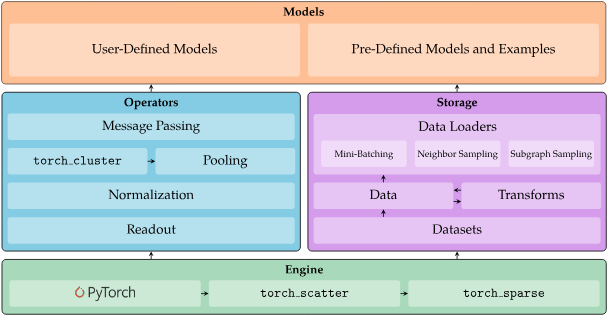

## 2-2. PyTorch Scatter
This package consists of a small extension library of highly optimized sparse update (scatter and segment) operations for the use in PyTorch, which are missing in the main package.
https://github.com/rusty1s/pytorch_scatter

  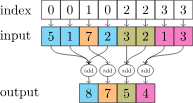

## 2-3. PyTorch Sparse
This package consists of a small extension library of optimized sparse matrix operations with autograd support.
*   Coalesce
*   Transpose
*   Sparse Dense Matrix Multiplication
*   Sparse Sparse Matrix Multiplication

https://github.com/rusty1s/pytorch_sparse

## 2-4 PyTorch Cluster
This package consists of a small extension library of highly optimized graph cluster algorithms for the use in PyTorch. The package consists of the following clustering algorithms:

* Graclus from Dhillon et al.: Weighted Graph Cuts without Eigenvectors: A Multilevel Approach (PAMI 2007)
* Voxel Grid Pooling from, e.g., Simonovsky and Komodakis: Dynamic Edge-Conditioned Filters in Convolutional Neural Networks on Graphs (CVPR 2017)
* Iterative Farthest Point Sampling from, e.g. Qi et al.: PointNet++: Deep Hierarchical Feature Learning on Point Sets in a Metric Space (NIPS 2017)
* k-NN and Radius graph generation
* Clustering based on Nearest points
* Random Walk Sampling from, e.g., Grover and Leskovec: node2vec: Scalable Feature Learning for Networks (KDD 2016)

## 2-5. PyTorch Spline Conv
This is a PyTorch implementation of the spline-based convolution operator of SplineCNN, as described in our paper:

Matthias Fey, Jan Eric Lenssen, Frank Weichert, Heinrich Müller: SplineCNN: Fast Geometric Deep Learning with Continuous B-Spline Kernels

# 3. DEV Environment on Google Colab

## 3-1. Know your working Environment
GPU 환경 및 CUDA 라이브러리 버젼 PyTorch 버젼 Python 버젼을 알아야지만 Geometry Library를 맞게 설치 할 수 있음.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive/MyDrive/Colab_Notebooks

# Just to read pkl file
# dataset_cellphone = pd.read_pickle('/content/gdrive/MyDrive/Colab_Notebooks/05-Big_Data/telecom_dataset.pkl')

Mounted at /content/gdrive
01-AI_class		      07-PyTorch	       AlphaFold2
01-Marketing-Analysis	      08-SkLearn	       COVID-19-Data-Analysis
02-plotly		      09-PyOD		       Numpy
03-Python_Lecture	      10-DFT_with_AI	       Panda_DataFrame
04-PyTorch_Lecture	      11-RDkit-ChemInfomatics  Tree-Based
05-Big_Data		      98-Pharmaco-Net
06-Basic-Tensorflow-examples  99-기말고사_채점


In [2]:
# Let's check GPU availability
!nvidia-smi

# Check python, conda, torch installation
print("\n+-----------------------------------------------------------------------------+")
! python --version
print("\n+-----------------------------------------------------------------------------+")
! conda --version
print("\n+-----------------------------------------------------------------------------+")
! pip3 show torch

Fri Jun 16 12:10:35 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    22W / 300W |      0MiB / 16384MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

이제 설정을 알았으니 RDkit 설치를 위해서 Anaconda의 Colab 버젼인 condacolab을 설치해줍시다.

In [3]:
!pip install condacolab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


conda init과 activation을 위해서 shell을 재시작 해야하지만 ipynb 환경에서는 쉽지않기 때문에 세션이 종료되었다가 다시 시작함. Vscode를 사용하면 ipynb 노트북 환경에 Python Interpreter를 설정하는 기능이 있음.36초 정도 걸림.

In [1]:
# Install condacolab
import condacolab
condacolab.install()

# to activate conda env session will restart, I think this is for conda init an activate
import condacolab
condacolab.check()

# install Rdkit
!mamba install -c conda-forge rdkit > /dev/null 2>&1

✨🍰✨ Everything looks OK!
✨🍰✨ Everything looks OK!


rdkit은 버젼에 따라 다양한 에러가 발생하니 반드시 체크할것.

In [2]:
import rdkit
import rdkit.Chem as Chem

# Check installed rdkit version
print(f"rdkit version installed is {rdkit.__version__}")

rdkit version installed is 2023.03.1


### **3-1-1. PyTorch Geometric과 extension 라이브러리 설치**
https://data.pyg.org/whl/torch-2.0.1%2Bcu118.html
Binary 파일의 설치나 환경 설정은 Anaconda를 활용해 설치하는게 빠르고 편리하지만 Google Colab의 경우 conda env에 설치되는 package와 Python 버젼을 코랩 환경으로 지정해주기가 어렵다. Vscode 환경처럼 노트북에서 쓸 Python Interpreter를 지정하는것이 불가!.
또한 pip install의 경우 whl 파일을 지정하지 않으면 dependency solve 에러가 나며 2시간이상 설치를 기다려야함!.

In [3]:
# Install PyTorch Geometric with quite mode
!pip install -q torch_geometric

# Install torch extensions for pytorch 2.0.1 using precompiled whl file (faster)
!pip install -q pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.0.1%2Bcu118.html

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.6/661.6 kB 21.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.1/282.1 kB 32.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 96.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 110.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 99.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.9/884.9 kB 52.1

### 3.1.2. (skip) Try other installation methods include conda install
참으로 다양한 시도를 해보았지만 역시 컴파일된 whl파일 설치가 제일 빠름. 1시간 안에 끝내야되기 때문에 마냥 기다릴수도 없고..

In [ ]:
# !mamba install -y -c conda-forge pytorch_geometric > /dev/null 2>&1
# !conda list pytorch
# import sys
# sys.path += ['/usr/local/bin',
#              '/usr/local/bin/conda',
#              '/usr/local/lib/python3.10',
#              '/usr/local/lib/python3.10/site-packages/',
#              '/usr/local/lib/python3.10/site-packages/rdkit']
# print(sys.path)

# # activate your conda environment
# %%bash
# source activate base
# python

# # python commands are ready to run within your environment
# import sys
# print("Python version")
# print (sys.version)
# import torch
# import torch_geometric
# print(torch_geometric.__version__)

6분 28초

In [ ]:
# #%%bash
# %%capture

# ## Install Miniconda
# # !MINICONDA_INSTALLER_SCRIPT=Miniconda3-py310_23.3.1-0-Linux-x86_64.sh
# # !MINICONDA_PREFIX=/usr/locall
# # !wget https://repo.anaconda.com/miniconda//$MINICONDA_INSTALLER_SCRIPT  > /dev/null 2>&1
# # !chmod +x $MINICONDA_INSTALLER_SCRIPT
# # !./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX > /dev/null 2>&1

# ##Initialization of conda first time
# # !conda init bash
# # IMPORTANT: You may need to close and restart your shell after running 'conda init'
# # !exec bash
# # !conda activate base

# # # update conda
# # !echo yes | conda update -n base -c conda-forge conda > /dev/null 2>&1

# # Install Pythorch Extension for graph computing
# !echo yes | conda install -c conda-forge pytorch_scatter > /dev/null 2>&1
# !echo yes | conda install -c pyg pytorch-sparse > /dev/null 2>&1
# !echo yes | conda install -c conda-forge pytorch_cluster > /dev/null 2>&1
# !echo yes | conda install -c pyg pytorch-spline-conv > /dev/null 2>&1
# !echo yes | conda install -c conda-forge pytorch_geometric > /dev/null 2>&1

# # Install RDKit for Cheminformatics, this will take about 1min
# !echo yes | conda install -c conda-forge rdkit > /dev/null 2>&1

# # Now Check conda installation
# !conda -V

# # Check Installation
# !conda list | grep "pytorch\|rdkit"

In [ ]:
## Here is alternate method to install condacolab
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# import condacolab
# condacolab.check()
# # Install required packages.
# !pip install -q torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# !pip install -q torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# !pip install torch-cluster -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# !pip install torch-spline-conv -f https://data.pyg.org/whl/torch-1.10.0+cu113.html
# !pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
# !mamba install -c conda-forge rdkit

In [ ]:
# !export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/bin/conda/env/lib
# !echo $LD_LIBRARY_PATH
# !ls /usr/lib/x86_64-linux-gnu/libstdc++.so.6 | grep GLIBCXX

# # !conda install -y libgcc

## 3-2. Import Required Modules
----
RDkit을 비롯한 PyTorch Geometry Library를 불러와 보겠습니다.

In [4]:
import rdkit
import rdkit.Chem as Chem
import numpy as np
import rdkit.Chem.AllChem as AllChem
import torch
import torch_geometric
from torch_geometric.data import Data

동일하게 반복 재현성을 위해 시드 값을 동일하게 주겠습니다.

In [5]:
torch.manual_seed(12345678)

데이터를 데이터프레임으로 가져오고 다루기위해 Panda 라이브러리를 불러오겠습니다. 구글 코랩 환경에는 이미 설치되어있습니다. 그리고 데이터 저장을 위해 joblib를 불러옴니다. 믈론 pkl로 저장 할 수도 있습니다.

In [6]:
import pandas as pd
import joblib

# **4. Get the Data for Trainning AI Model**

### 4-1-1. Read Data from Github
AWS bitbuckt에서 읽을 수도 있지만 크기가 작은 파일의 경우 Github에서도 가능함. 우선 주소에서 Remove "blob" Replace github.com by raw.githubusercontent.com.
원래 주소는 https://github.com/kingdavid72/KoreaUniv_Lecture/blob/main/PubchemQC_HOMO-LUMO_100000.csv
그리고 csv 파일에서 헤더 정보를 빼고 읽어야하니까 인덱스 칼럼을 스킵.

In [7]:
# read from github, replace github.com and remove blob and use index column
pubchem = pd.read_csv("https://raw.githubusercontent.com/kingdavid72/KoreaUniv_Lecture/main/PubchemQC_HOMO-LUMO_100000.csv", index_col=0)

우선 불러온 데이터들을 들여다 봅시다. 일단 호모-루모 에너지 갭이 eV 값으로 되어있고 Oscillator_Streng와 SMILES 스트링 뿐이네요. 이래가지곤 학습을 할수 없겠죠. 이래서 Feature Engineering이 중요한듯 해요.

In [8]:
# Check the data in Panda DataFrame
pubchem

,HOMO-LUMO_gap(eV),Oscillator_Strength,SMILES
#Index,,,
1,4.015,0.002,CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C
2,5.758,0.000,CC(=O)OC(CC(=O)O)C[N+](C)(C)C
3,4.039,0.053,C1=CC(C(C(=C1)C(=O)O)O)O
4,5.596,0.004,CC(CN)O
5,4.278,0.001,C(C(=O)COP(=O)(O)O)N
...,...,...,...
303049,4.282,0.092,COC(C1=CC=CC2=CC=CC=C21)C(=O)O
303051,5.805,0.005,CCS(=O)(=O)N1CCCCC1C
303052,5.891,0.019,CCN(CC)S(=O)(=O)CC


# **5. Feature Engeneering**
인공지능의 90% 이상은 이 Feature Engeneering 이라고 봐요. HOMO-LUMO_gap(eV)은 우리가 Linear Regression으로 학습해야하는 최종 Y-hat 값이니까 Featrue로 쓸수 없으니 어떻게든 SMILES 스트링을 가공해서 숫자로 추출해내는 작업이 필요할거에요.

## 5-1. Graph Representation of Chemcial
그래서 이번 실습에서는 화학 구조식을 그래프로 구현된 숫자들의 행렬로 바꿔서 Feature로 이용할꺼에요.

### 5-1-1. Check Atom Types

이번 예측에서는 H, B, C, N, O, F, P, S, Cl 만으로 이루어진 분자들만 고려하도록 할거에요. 따라서 분자가 H, B, C, N, O, F, P, S, Cl만으로 구성되어 있는지를 확인하는 함수를 정의해 봅시다.

In [9]:
def check_atoms(mol):
  """
  This function checks whether all atoms are valid
  """
  valid_atoms = ('H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'Cl')
  flag = True
  for atm in mol.GetAtoms(): # 분자 안에 존재하는 모든 atom에 대해서 loop을 수행.
    if atm.GetSymbol() not in valid_atoms:
      flag = False
      break
  return flag

tqdm은 대표적인 작업진행 상황을 모니터링하는 툴이랍니다. 일단 학습하려는

In [10]:
from tqdm import tqdm

# Assign List for Homo-Lumo data
homo_lumo_data = []

# Seperate SMILES and Homo-Lumo-gap values
for smi, score in tqdm(zip(pubchem["SMILES"], pubchem["HOMO-LUMO_gap(eV)"])):
  mol = Chem.MolFromSmiles(smi)
  if check_atoms(mol): # 모든 atom들이 원하는 atom들로만 구성되어 있을 때.
    homo_lumo_data.append((mol, score))
  else:
    continue

389it [00:00, 3885.31it/s][12:38:53] WARNING: not removing hydrogen atom without neighbors
16142it [00:04, 3405.17it/s][12:38:57] WARNING: not removing hydrogen atom without neighbors
41583it [00:11, 3989.64it/s][12:39:04] WARNING: not removing hydrogen atom without neighbors
99999it [00:27, 3595.13it/s]


약 10만개의 학습 데이터를 가지고 학습할게요.

In [11]:
print(f"Total data size is {len(homo_lumo_data):10,.0f}")

Total data size is     99,999


### 5-1-2 Define Function of Convert Molecule to Graph using RDKit
### def convert_mol_to_graph(mol, use_pos = False):

https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.HybridizationType

이제 화학구조식 (SMILE) 스트링을 그래프로 변환하여주는 함수를 정의해보겠습니다.

In [12]:
def convert_mol_to_graph(mol, use_pos = False):

    mol2 = Chem.AddHs(mol) # 수소 붙임.
    n_bonds = len(mol2.GetBonds()) # 분자의 공유 결합 개수
    n_atoms = len(mol2.GetAtoms()) # 분자의 원자 개수

    edge_index = []
    edge_attr = []
    edge_weight = []
    for edge_idx in range(n_bonds): # 전체 공유 결합에 대해서 loop을 돌린다.
        bond = mol2.GetBondWithIdx(edge_idx) # 각 공유 결합에 대해서 시작 atom과 끝 atom의 인덱스를 확인.
        edge_index.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
        edge_index.append([bond.GetEndAtomIdx(), bond.GetBeginAtomIdx()]) # undirected graph를 만들기 위해서 순서를 바꿔서 edge를 2번 넣어준다.

        # BondType (4-dimensional one-hot)
        btype = bond.GetBondType() # 공유 결합의 종류.
        if btype == Chem.rdchem.BondType.SINGLE:
            bond_one_hot = [1, 0, 0, 0]
            edge_weight.extend([1.0, 1.0])
        elif btype == Chem.rdchem.BondType.AROMATIC:
            bond_one_hot = [0, 1, 0, 0]
            edge_weight.extend([1.5, 1.5])
        elif btype == Chem.rdchem.BondType.DOUBLE:
            bond_one_hot = [0, 0, 1, 0]
            edge_weight.extend([2.0, 2.0])
        elif btype == Chem.rdchem.BondType.TRIPLE:
            bond_one_hot = [0, 0, 0, 1]
            edge_weight.extend([3.0, 3.0])

        # BondStereo (6-dimensional one-hot)
        stype = bond.GetStereo()
        if stype == Chem.rdchem.BondStereo.STEREOANY:
          stereo_one_hot = [1, 0, 0, 0, 0, 0]
        elif stype == Chem.rdchem.BondStereo.STEREOCIS:
          stereo_one_hot = [0, 1, 0, 0, 0, 0]
        elif stype == Chem.rdchem.BondStereo.STEREOE:
          stereo_one_hot = [0, 0, 1, 0, 0, 0]
        elif stype == Chem.rdchem.BondStereo.STEREONONE:
          stereo_one_hot = [0, 0, 0, 1, 0, 0]
        elif stype == Chem.rdchem.BondStereo.STEREOTRANS:
          stereo_one_hot = [0, 0, 0, 0, 1, 0]
        elif stype == Chem.rdchem.BondStereo.STEREOZ:
          stereo_one_hot = [0, 0, 0, 0, 0, 1]

        # Is this bond included in a ring?
        if bond.IsInRing():
          ring_bond = 1
        else:
          ring_bond = 0

        # Is this bond a conjugated bond?
        if bond.GetIsConjugated():
          conjugate = 1
        else:
          conjugate = 0

        # In total 12-dimensional edge attribute
        # bond-type (4-dim), bondstereo (6-dim), (ring, conjugate)
        # Can you image more?
        attr = bond_one_hot + stereo_one_hot + [ring_bond, conjugate] # 12 차원의 공유 결합 속성.

        # 분자는 undirected graph이므로 edge가 두 번 정의된다.
        # 그러므로 동일한 attribute를 두 번 넣어주어야 한다.
        edge_attr.append(attr)
        edge_attr.append(attr)
    ## edge 속성 계산 완료

    ## node 속성 계산
    # RDKit으로 계산할 수 있는 Atom의 속성은 아래 링크에서 확인할 수 있다.
    # https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Atom
    #
    #.        0.   1.   2.   3.   4.   5.   6.   7.   8.
    #        'H', 'B', 'C', 'N', 'O', 'F', 'P', 'S', 'Cl'
    valid_atoms = {'H': 0, 'B':1, 'C':2, 'N':3, 'O':4, 'F':5, 'P':6, 'S':7, 'Cl':8}
    node_attr = []
    for atm_id in range(n_atoms):
        # Select an atom.
        atm = mol2.GetAtomWithIdx(atm_id)

        # Atom symbol check (9-dim)
        sym = atm.GetSymbol()
        atm_one_hot = [0] * len(valid_atoms) # 0이 9개 들어있는 리스트를 만든다.
        idx = valid_atoms[sym] # sym에 해당하는 원소 기호가 몇 번째에 있는지?
        atm_one_hot[idx] = 1   # 해당되는 원소의 위치만 1로 바꾼다.

        # Check hybridization (7-dim)
        hybrid = atm.GetHybridization()
        hybrid_one_hot = [0] * 7 # [0, 0, 0, 0, 0, 0, 0]
        if hybrid == Chem.HybridizationType.SP3:
          hybrid_one_hot[0] = 1
        elif hybrid == Chem.HybridizationType.SP2:
          hybrid_one_hot[1] = 1
        elif hybrid == Chem.HybridizationType.SP:
          hybrid_one_hot[2] = 1
        elif hybrid == Chem.HybridizationType.S:
          hybrid_one_hot[3] = 1
        elif hybrid == Chem.HybridizationType.SP3D:
          hybrid_one_hot[4] = 1
        elif hybrid == Chem.HybridizationType.SP3D2:
          hybrid_one_hot[5] = 1
        else: # hybridization이 제대로 정의되지 않은 나머지의 모든 경우.
          hybrid_one_hot[6] = 1

        # aromatic 인지 아닌지?  (True/False)
        if atm.GetIsAromatic():
          arom = 1
        else:
          arom = 0

        # ring 안에 존재하는지 아닌지? (True/False)
        if atm.IsInRing():
          ring_flag = 1
        else:
          ring_flag = 0

        # Degree (공유 결합의 개수)  (6-dim, one-hot)
        # 0, 1, 2, 3, 4, >=5
        degree_one_hot = [0, 0, 0, 0, 0, 0]
        degree = atm.GetTotalDegree()
        if degree >= 5: # 5개 이상의 공유 결합을 가지는 원자.
          degree_one_hot[5]=1
        else:
          degree_one_hot[degree]=1

        # Number of hydrogens (5-dim, one-hot)
        # 결합되어 있는 수소의 개수.
        # 0, 1, 2, 3, >=4
        num_h = atm.GetTotalNumHs()
        hydrogen_one_hot = [0, 0, 0, 0, 0]
        if num_h >= 4:
          hydrogen_one_hot[4] = 1
        else:
          hydrogen_one_hot[num_h] = 1

        # Chirality (4-dim, one-hot)
        chiral = atm.GetChiralTag()
        if chiral == Chem.rdchem.ChiralType.CHI_OTHER:
          chiral_one_hot = [1, 0, 0, 0]
        # Counter-clock-wise (반시계)
        elif chiral == Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW:
          chiral_one_hot = [0, 1, 0, 0]
        # Clockwise (시계방향)
        elif chiral == Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW:
          chiral_one_hot = [0, 0, 1, 0]
        # Chirality 정의되지 않음.
        elif chiral == Chem.rdchem.ChiralType.CHI_UNSPECIFIED:
          chiral_one_hot = [0, 0, 0, 1]

        # 원자 특성 계산 [원자 symbol one-hot, 공유 결합 개수, 전체 valence의 개수 (explicit + implicit), is an atom aromatic (True/False)? ]
        # 더 추가 가능!
        # in total 25-dim.
        # 9-dim, 7-dim, 6-dim, 5-dim, 4-dim, 4-dim = 35-dim
        attr = atm_one_hot + hybrid_one_hot + \
                degree_one_hot + hydrogen_one_hot + \
                chiral_one_hot + \
                [arom, ring_flag, atm.GetFormalCharge(), atm.GetNumRadicalElectrons()]

        #print(atm_id, attr)
        node_attr.append(attr)

    ## node 속성 계산 완료

    # PyTorch Tensor로 변환.
    edge_attr = torch.tensor(edge_attr, dtype = torch.float)
    node_attr = torch.tensor(node_attr, dtype = torch.float)
    edge_index = torch.tensor(edge_index, dtype = torch.long)
    edge_index = edge_index.t().contiguous()
    edge_weight = torch.tensor(edge_weight, dtype = torch.float)

    if use_pos: # 만일 3D 좌표 정보를 사용한다면
        val = AllChem.EmbedMolecule(mol2)
        if val !=0:
          print(f"Error while generating 3D: {Chem.MolToSmiles(mol)}")
          return None

        pos_list = [] # this is optional
        for atm_id in range(n_atoms):
          # Get Atomic Position.
          atm_pos = mol2.GetConformer(0).GetAtomPosition(atm_id)
          crd = [atm_pos.x, atm_pos.y, atm_pos.z]
          pos_list.append(crd)

        pos = torch.tensor(pos_list, dtype=torch.float)
    else:
      pos = None
    #print(edge_attr.shape)
    #print(node_attr.shape)
    #print(edge_index.shape)

    return edge_index, node_attr, edge_attr, pos, edge_weight

### 5-1-3 Convert Molecule to Graph using UDF (User-Defined-Function)

위에서 정의한 함수를 사용하요 엣지 인덱스 엣지 속성 엣지 웨이트를 torch tensor로 바꾸어 주겠습니다. 하지만 10만개를 아무런 확인도 하지 않고 돌리다가 에러가 발생하면 돌일킬수없겠지요. 돌다리도 두드려가면서 ^^ 자 우선 화합물 하나를 확인 사살해봅시다.

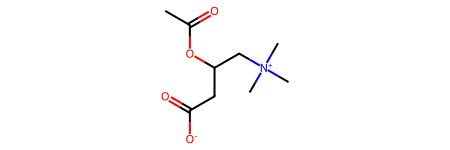

In [17]:
# check chemical CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C 3-acetyloxy-4-(trimethylazaniumyl)butanoate
homo_lumo_data[0][0]

위에서 만든 함수를 하용하여 첫번째 화합물의 edge_index, node_attr, edge_attr, pos, edge_weight에 값을 할당하여 보겠습니다.

In [13]:
edge_index, x, edge_attr, pos, edge_weight = convert_mol_to_graph(homo_lumo_data[0][0])

그리고 이제 DataFrame Instance 이름을 d0로 정의하고 해당 값들을 할당해볼께요.

In [14]:
d0 = Data(x = x, edge_index = edge_index, edge_attr = edge_attr, pos = pos, edge_weight = edge_weight)

데이터들이 잘 입력되었는지 확인해봅시다.

In [15]:
print(d0)

Data(x=[31, 35], edge_index=[2, 60], edge_attr=[60, 12], edge_weight=[60])


노드의 갯수는 다음 명령어로 확인이 가능해요.

In [ ]:
d0.num_nodes

31

## 5-2. Converting Chemcials to PyTorch Geometric Data
자 이제는 잘되는것을 확인하였으니 전체 데이터를 만들어진 UDF를 통해 만들어 볼께요. 예상 시간은 1분 30초 정도입니다.


In [18]:
data_list = []
for mol, score in tqdm(homo_lumo_data):
    result = convert_mol_to_graph(mol)
    if result is None:
        continue

    edge_index, node_attr, edge_attr, pos, edge_weight = result
    y = torch.tensor([[score]], dtype = torch.float)
    dtmp = Data(x = node_attr, pos = pos, edge_index = edge_index, edge_attr = edge_attr, edge_weight = edge_weight, y = y)
    data_list.append(dtmp)

100%|██████████| 99999/99999 [01:22<00:00, 1217.18it/s]


DataLoader()를 통해 학습, 검증, 테스트 셋을 나누어줄거에요.

In [19]:
from torch_geometric.loader import DataLoader
import random
random.seed(12345)
random.shuffle(data_list)

In [20]:
train_set, val_set, test_set = data_list[:-20000], data_list[-20000:-15000], data_list[-15000:]
print(f"Number of training set: {len(train_set)}")
print(f"Number of Validaation set: {len(val_set)}")
print(f"Number of test set: {len(test_set)}")

Number of training set: 79999
Number of Validaation set: 5000
Number of test set: 15000


In [21]:
train_loader = DataLoader(train_set, batch_size=100, shuffle=True, drop_last = False)
test_loader = DataLoader(test_set, batch_size=100, shuffle=True, drop_last = False)
val_loader = DataLoader(val_set, batch_size=100, shuffle=False, drop_last = False)

데이터가 학습, 검증, 최종 테스트 용으로 잘 나누어 져 입력되었는지 최종 확인 해봅시다.

In [22]:
print(train_loader)
print(len(train_loader.dataset))
print(len(test_loader.dataset))
print(len(val_loader.dataset))

79999
15000
5000


특히나 최종 시험을 위한 데이터들이 잘 로딩되었는지 확인해보고

In [23]:
for batch in train_loader:
    print(batch)
    print(batch.batch)
    print(batch.num_graphs)
    print(batch.num_node_features)
    break

DataBatch(x=[2965, 35], edge_index=[2, 6010], edge_attr=[6010, 12], y=[100, 1], edge_weight=[6010], batch=[2965], ptr=[101])
tensor([ 0,  0,  0,  ..., 99, 99, 99])
100
35


자 이제 우리는 edge_weight, edge_attr, edge_index라는 새로운 Feature 값 들을 가지게 되었네요.

In [24]:
data = data_list[0]
print(data.keys)

['y', 'x', 'edge_weight', 'edge_attr', 'edge_index']


그리고 노드당 35개의 노드 피쳐도 가지게 되었구요.

In [25]:
data.num_node_features

35

# **6. Model building and Hyperparameter Optimization**
지루하고 힘들었던 Feature Engineering이 끝났군요, 본격적으로 모델을 만들고 학습을 시켜볼 단계에요.

## 6-1.  Building Graph Convolution Network (GCN)
간단한 GCNCov를 레이어로 가지는 NN를 구성하여봅시다. 3개의 GCN그리고 2개의 Linear 레이어로 Linear Regression을 하여 값을 구해볼거에요.


In [26]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool

class GCN(torch.nn.Module):
    def __init__(self, in_channel=35, hidden_layer_size=70):
        super().__init__()
        self.conv1 = GCNConv(in_channel, hidden_layer_size) # 가장 기본적인 graph convolution model, https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        self.conv2 = GCNConv(hidden_layer_size, hidden_layer_size)
        self.conv3 = GCNConv(hidden_layer_size, hidden_layer_size)
        #self.conv4 = GCNConv(hidden_layer_size, hidden_layer_size)
        #self.conv5 = GCNConv(hidden_layer_size, hidden_layer_size)
        self.lin1 = Linear(hidden_layer_size, int(hidden_layer_size/2))
        self.lin2 = Linear(int(hidden_layer_size/2), 1)

    def forward(self, data):
        x, edge_index, batch, edge_weight = data.x, data.edge_index, data.batch, data.edge_weight

        x = self.conv1(x, edge_index)
        x = F.gelu(x)
        x = F.dropout(x, training=self.training)

        x = self.conv2(x, edge_index)
        x = F.gelu(x)

        x = self.conv3(x, edge_index)
        x = F.gelu(x)

        #x = self.conv4(x, edge_index)
        #x = F.elu(x)

        #x = self.conv5(x, edge_index)
        #x = F.elu(x)

        # READOUT
        x = global_mean_pool(x, batch) # 전체의 node feature의 평균 값을 취한다. # [batch_size, hidden_channels]
        x = self.lin1(x) # 70 dim -> 35-dim
        x = F.elu(x)
        x = self.lin2(x) # 35 dim -> 1-dim

        return x

그리고 사용된 파라메터들을 출력하여주는 UDF도 하나 만들어보아요. TensorFlow는 모델 서머리에서 보여주죠.

In [27]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

학습은 GPU에서 하는것이 빠르니까 모든 학습을 GPU에게 맞기죠.

In [28]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)
model = GCN(in_channel = 35, hidden_layer_size = 70)
model.to(device)

cuda


GCN(
  (conv1): GCNConv(35, 70)
  (conv2): GCNConv(70, 70)
  (conv3): GCNConv(70, 70)
  (lin1): Linear(in_features=70, out_features=35, bias=True)
  (lin2): Linear(in_features=35, out_features=1, bias=True)
)

1만 4천개 파마메터를 가지는 모델을 10만개 학습 데이터로 학습하게되겠죠.

In [29]:
count_parameters(model)

+------------------+------------+
|     Modules      | Parameters |
+------------------+------------+
|    conv1.bias    |     70     |
| conv1.lin.weight |    2450    |
|    conv2.bias    |     70     |
| conv2.lin.weight |    4900    |
|    conv3.bias    |     70     |
| conv3.lin.weight |    4900    |
|   lin1.weight    |    2450    |
|    lin1.bias     |     35     |
|   lin2.weight    |     35     |
|    lin2.bias     |     1      |
+------------------+------------+
Total Trainable Params: 14981


14981

최적화 알고리즘은 최애 아담이구 손실함수는 MSE를 써줄꺼에요.

In [30]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = torch.nn.MSELoss()

In [31]:
import sys

최종 평가를 위한 함수도 정의해야하구요.

In [32]:
def test(loader):
    model.eval()
    error = 0.0
    out_all = []
    true = []
    for data in loader:  # Iterate in batches over the training/test dataset.
        out = model(data.to(device))
        tmp = (out - data.y)**2
        error += tmp.sum().item()  # Check against ground-truth labels.

        out_all.extend([x.item() for x in out])
        true.extend([x.item() for x in data.y])

    return error / len(loader.dataset), out_all, true  # Derive ratio of correct predictions.

학습을 위한 함수도 정의하여 봅시다.

In [33]:
def train():
    model.train()
    for idx, batch in enumerate(train_loader):
        out = model(batch.to(device))
        loss = criterion(out, batch.y)
        loss.backward()
        optimizer.step()  # Update parameters based on gradients.
        optimizer.zero_grad()  # Clear gradients.
        if idx%100 == 0:
            print(f"IDX: {idx:5d}\tLoss: {loss:.4f}")

자 이제 대망의 학습이네요. V100사용 20 epoch 기준 5분 36초 걸려요.

In [34]:
train_acc_list = []
val_acc_list = []
test_acc_list = []
for epoch in range(1, 20):
    print("="*100)
    print("Epoch: ", epoch)

    train()

    train_acc, out_tmp, true_tmp = test(train_loader)
    train_acc_list.append(train_acc)

    test_acc, out_all, true_all = test(test_loader)
    test_acc_list.append(test_acc)

    val_acc, val_pred, val_true = test(val_loader)
    val_acc_list.append(val_acc)

    print("-"*100)
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}, Test Acc: {test_acc:.4f}')

Epoch:  1
IDX:     0	Loss: 22.9664
IDX:   100	Loss: 0.6830
IDX:   200	Loss: 0.6827
IDX:   300	Loss: 0.5078
IDX:   400	Loss: 0.4582
IDX:   500	Loss: 0.6205
IDX:   600	Loss: 0.6328
IDX:   700	Loss: 0.5066
----------------------------------------------------------------------------------------------------
Epoch: 001, Train Acc: 0.4397, Val Acc: 0.4451, Test Acc: 0.4480
Epoch:  2
IDX:     0	Loss: 0.3298
IDX:   100	Loss: 0.4010
IDX:   200	Loss: 0.4484
IDX:   300	Loss: 0.3675
IDX:   400	Loss: 0.4215
IDX:   500	Loss: 0.2527
IDX:   600	Loss: 0.3112
IDX:   700	Loss: 0.3123
----------------------------------------------------------------------------------------------------
Epoch: 002, Train Acc: 0.2639, Val Acc: 0.2789, Test Acc: 0.2788
Epoch:  3
IDX:     0	Loss: 0.1864
IDX:   100	Loss: 0.2400
IDX:   200	Loss: 0.2477
IDX:   300	Loss: 0.2820
IDX:   400	Loss: 0.2031
IDX:   500	Loss: 0.2454
IDX:   600	Loss: 0.2116
IDX:   700	Loss: 0.1857
-------------------------------------------------------------

## 6-2. Plot Loss Function
자 이제 학습이 다되었습니다. 얼마나 좋은 학습 결과가 나왔는데 그래프로 확인하여 보기위해 UDF를 정의해 봅시다.

In [35]:
import matplotlib.pyplot as plt
def draw_loss_change(train_loss, val_loss, test_loss):
  plt.figure(figsize=(8,8)) # 빈 그림을 정의
  plt.plot(train_loss, color = 'r', label = 'Train loss') # training loss
  plt.plot(val_loss, color = 'b', label = 'Val loss') # validation set loss
  plt.plot(test_loss, color = 'g',  label = 'Test loss') # test set loss
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(loc='best') # label을 표시 하겠다.

정의된 함수를 사용하여 학습, 검증 그리고 최종 테스트의 MSE 값의 변화를 확인해보겠습니다.

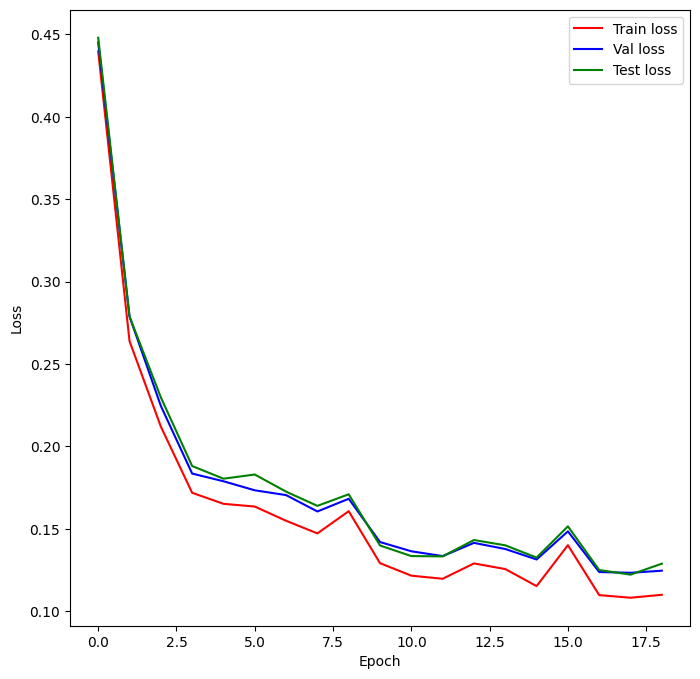

In [36]:
draw_loss_change(train_acc_list, val_acc_list, test_acc_list)

학습이 잘되었다면 이제 최종적으로 실측 값과 인공지능 예측값간의 상관 관계를 그래프와 값으로 확인해보아요.

(-0.5, 12.0)

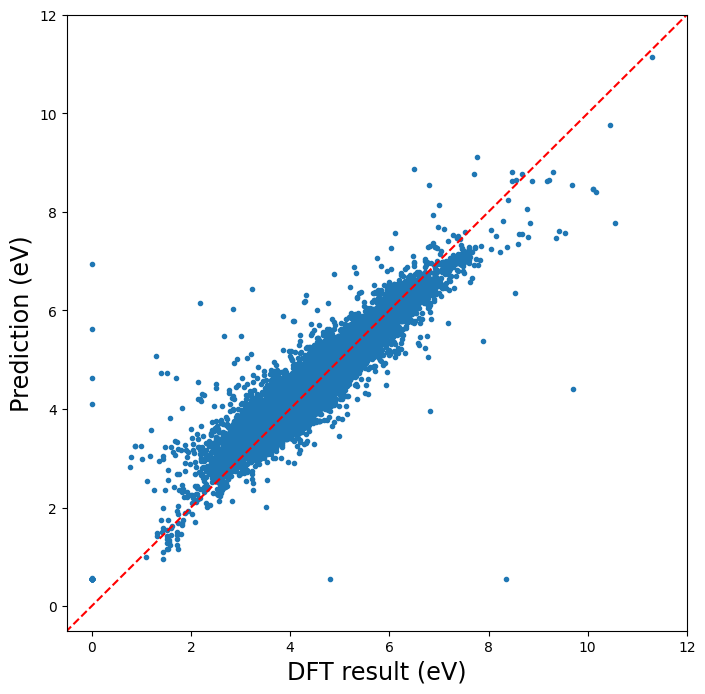

In [37]:
import matplotlib.pyplot as plt
#out_all = [x.detach().numpy() for x in out_all]
experimental = [x for x in true_all]
prediction = [x for x in out_all]

plt.figure(figsize=(8, 8))
plt.scatter(experimental, prediction, marker = '.')
plt.plot(range(-1, 16), range(-1, 16), 'r--')
plt.xlabel("DFT result (eV)", fontsize='xx-large')
plt.ylabel("Prediction (eV)", fontsize='xx-large')
plt.xlim(-0.5, 12)
plt.ylim(-0.5, 12)

In [38]:
print(true_all)
corr = np.corrcoef(experimental, prediction)
print(corr)
print(f"Pearson R: {corr[0,1]:.4f}")

[4.432000160217285, 3.6110000610351562, 5.234000205993652, 3.7170000076293945, 4.784999847412109, 3.8440001010894775, 4.0970001220703125, 6.605000019073486, 5.789000034332275, 3.6429998874664307, 5.828999996185303, 5.257999897003174, 3.7100000381469727, 6.2729997634887695, 4.89900016784668, 3.937999963760376, 3.4579999446868896, 3.6600000858306885, 3.5869998931884766, 5.164999961853027, 3.7669999599456787, 5.386000156402588, 4.0879998207092285, 5.204999923706055, 3.627000093460083, 5.14300012588501, 4.107999801635742, 4.269999980926514, 4.802000045776367, 4.135000228881836, 5.361000061035156, 3.509000062942505, 4.644999980926514, 4.915999889373779, 4.822000026702881, 3.247999906539917, 4.205999851226807, 5.252999782562256, 2.937000036239624, 5.283999919891357, 5.383999824523926, 3.990999937057495, 4.111999988555908, 3.875, 5.703999996185303, 4.942999839782715, 3.740000009536743, 4.2129998207092285, 3.821000099182129, 3.9070000648498535, 4.874000072479248, 5.593999862670898, 7.364999771

# **7. Final Conclusion**
인공지능을 활용하면 복잡한 DFT 계산도 빠르고 정확하게 계산가능하며 이러한 예측치를 활용하여 신규 물질의 물성을 예측하여 볼 수 있다.

한학기 수고들 많으 셨습니다.

-- 최재문 올림 --